<a href="https://colab.research.google.com/github/ASHEESHPATEL1996/advance-data-analytics/blob/main/insurance_data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# reading the dataset

df = pd.read_csv('/content/drive/MyDrive/1kaggle/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA and Data Cleaning

In [ ]:
# inforamation about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Here we can see the the dataset has no null values.

In [ ]:
# Statistical inforamation about the interger features.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
# defining the unique values per columns in dataset

df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
# checking the correlation in numerical featur in dataset

df.corr()

<ipython-input-7-f2b4319f8cad>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: xlabel='charges', ylabel='Density'>

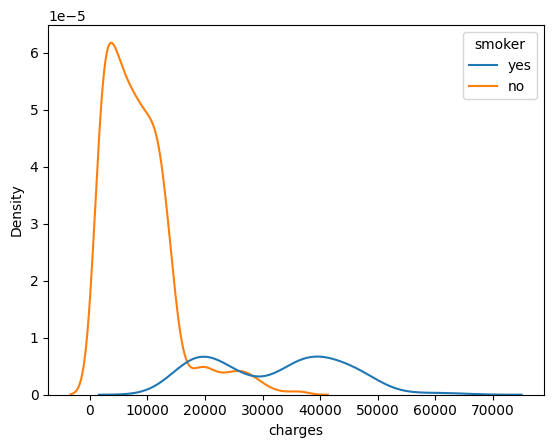

In [ ]:
# performing the Univariate analysis in the dataset

sns.kdeplot(x = 'charges',data=df,hue='smoker')

<Axes: xlabel='charges', ylabel='Density'>

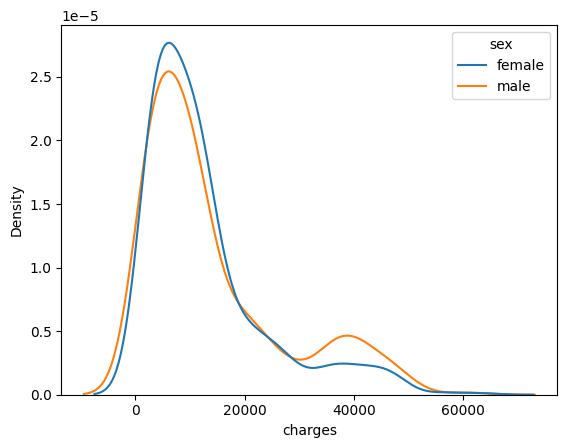

In [ ]:
sns.kdeplot(x = 'charges',data=df,hue='sex')

<Axes: xlabel='charges', ylabel='Density'>

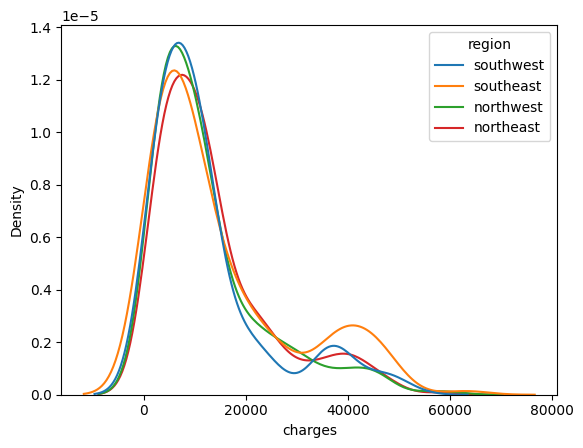

In [ ]:
sns.kdeplot(x = 'charges',data=df,hue='region')

- Here we can see that the insurance charges are not affected by Person's Region or Gender.
- There are hight insurance charges for the smoker person.


### Bivariate Analysis

<Axes: xlabel='age', ylabel='charges'>

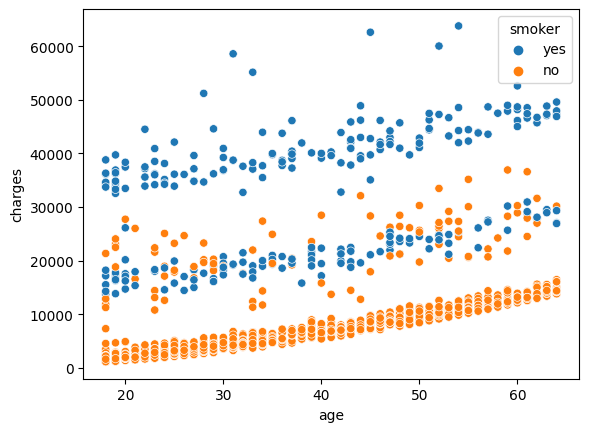

In [ ]:
sns.scatterplot(x='age',y='charges',data=df,hue='smoker')

<Axes: xlabel='bmi', ylabel='charges'>

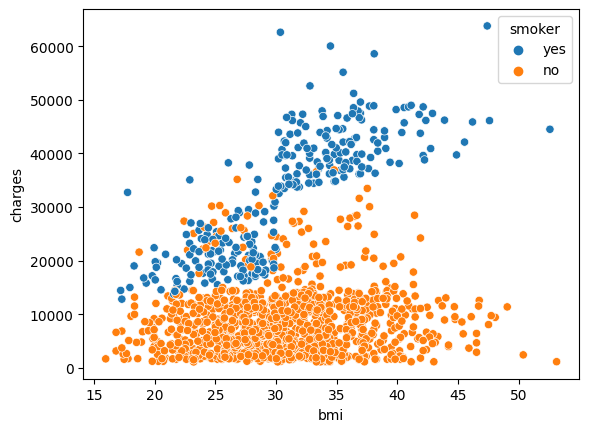

In [ ]:
sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker')

- for both smoker and Non-smoker, if age is increasing the insurance charges are also increasing.
- for both smoker and Non-smoker, insurance charges are increasing with increase in BMI, but for somoker group, rate of increase of charges is higher, compare to Non-smoker group.

### performing the feature Engineering



In [ ]:
# performing the one-hot encoding 

ohe_data = pd.get_dummies(data=df[['smoker','sex','region']],drop_first=True)

In [ ]:
# encoded dataset

df_fe = pd.concat([df,ohe_data],axis=1)
df_fe.drop(['sex','smoker','region'],axis=1,inplace=True)

### splitting the dataset into dependent and independent features

In [ ]:
X = df_fe.drop('charges',axis=1)
print(X.shape)
print(X.head())

(1338, 8)
   age     bmi  children  smoker_yes  sex_male  region_northwest  \
0   19  27.900         0           1         0                 0   
1   18  33.770         1           0         1                 0   
2   28  33.000         3           0         1                 0   
3   33  22.705         0           0         1                 1   
4   32  28.880         0           0         1                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


In [ ]:
y = df_fe.loc[:,'charges']
print(y.shape)
print(y.head())

(1338,)
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


## Splitting the dataset into train test split

In [ ]:
# spllitting the dataset with 25% as test and rest as train data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=10)

In [ ]:
X_train

,age,bmi,children,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest
859,57,28.100,0,0,1,0,0,1
1327,51,30.030,1,0,1,0,1,0
564,18,32.120,2,0,0,0,1,0
739,29,35.500,2,1,1,0,0,1
966,51,24.795,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...
1180,42,41.325,1,0,0,0,0,0
1147,20,31.920,0,0,0,1,0,0
527,51,25.800,1,0,0,0,0,1
1149,42,34.100,0,0,1,0,0,1


In [ ]:
# using the Linear Regression 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(lr.intercept_)
print(lr.coef_)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

-12789.733928663718
[  260.56133142   352.29691581   560.97929154 24301.49053964
  -258.69822913    81.64540423  -870.43134066  -548.48369958]
0.7162745306503483
38150907.330791965


In [ ]:
# using the Ridge Regression 

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print(ridge.intercept_)
print(ridge.coef_)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

-12757.108802824594
[  260.47829974   352.00894837   559.71622655 24149.56620329
  -246.9303012     83.46763822  -851.40462497  -547.61388686]
0.7169071446699533
38065843.41709598


In [ ]:
# using the lasso Regression 

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error
ls = Lasso()
ls.fit(X_train,y_train)
y_pred = ls.predict(X_test)
print(ls.intercept_)
print(ls.coef_)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

-12788.09076153873
[  260.56777502   352.08690288   560.23449103 24294.44140105
  -253.94992565    81.38608721  -861.44376124  -540.23672345]
0.7163088416299062
38146293.733695656


In [ ]:
# using the ElasticNet Regression 

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
es = ElasticNet()
es.fit(X_train,y_train)
y_pred = es.predict(X_test)
print(es.intercept_)
print(es.coef_)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

-8766.410515038642
[ 248.37551924  344.79018155  340.26752139 5911.43368056  357.71565555]
0.37602445128086404
83902348.9517158


Here we can see that all basic models are not performing. so we need to perform feature selection.

## Feature Selction

<Axes: >

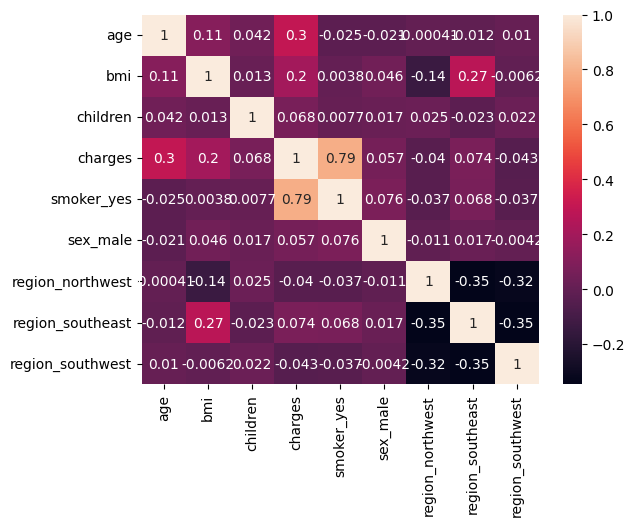

In [ ]:
sns.heatmap(df_fe.corr(),annot=True)

In [ ]:
# creating the function for finding the feature with higher correlation

def correlation(dataset,threshold):
  col_corr = set()
  corr_metrix = dataset.corr()
  for i in range(len(corr_metrix.columns)):
    for j in range(i):
      if abs(corr_metrix.iloc[i,j] > threshold):
        colname = corr_metrix.columns[i]
        col_corr.add(colname)

  return col_corr

In [ ]:
# removing the correlated features from the dataset

corr_features = correlation(df_fe, 0.85)
corr_features

set()

here we can see that there are no features that are highly correlated.

<Axes: >

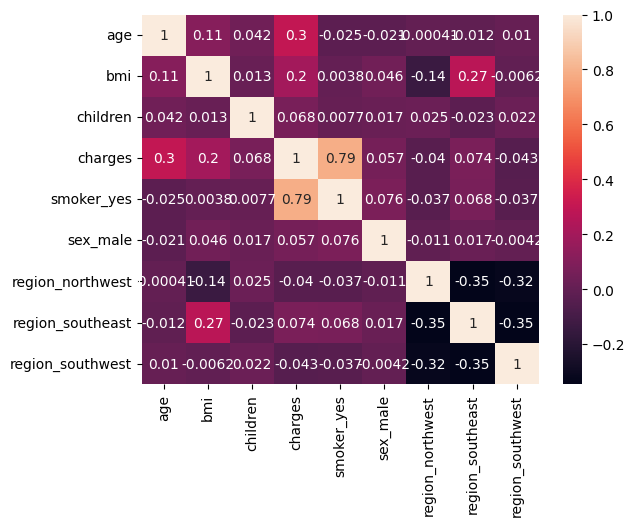

In [ ]:
sns.heatmap(df_fe.corr(),annot=True)

Here we can see that region and children feature is very weak relation with charges

In [ ]:
df_fs = df_fe.drop(['children','region_northwest','region_southeast','region_southwest'],axis=1)
X = df_fs.drop('charges',axis=1)
y = df_fs.loc[:,'charges']

In [ ]:
X

,age,bmi,smoker_yes,sex_male
0,19,27.900,1,0
1,18,33.770,0,1
2,28,33.000,0,1
3,33,22.705,0,1
4,32,28.880,0,1
...,...,...,...,...
1333,50,30.970,0,1
1334,18,31.920,0,0
1335,18,36.850,0,0
1336,21,25.800,0,0


In [ ]:
# spllitting the dataset with 25% as test and rest as train data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=10)

In [ ]:
# using the Linear Regression 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(lr.intercept_)
print(lr.coef_)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

-12187.51150284184
[  263.59698614   337.24043137 24220.95670425  -234.88460971]
0.7161508102308272
38167543.29326265


In [ ]:
# using the Ridge Regression 

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print(ridge.intercept_)
print(ridge.coef_)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

-12160.698205205157
[  263.49773347   337.29289637 24071.4234334   -223.22782166]
0.7166830528650927
38095975.7337344


In [ ]:
# using the lasso Regression 

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error
ls = Lasso()
ls.fit(X_train,y_train)
y_pred = ls.predict(X_test)
print(ls.intercept_)
print(ls.coef_)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

-12186.86515283127
[  263.59528247   337.19165572 24214.28119838  -230.35353616]
0.7161829288315195
38163224.492552176


In [ ]:
# using the ElasticNet Regression 

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
es = ElasticNet()
es.fit(X_train,y_train)
y_pred = es.predict(X_test)
print(es.intercept_)
print(es.coef_)
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

-8489.068368150605
[ 249.89936082  345.78683099 5907.33953034  359.42627851]
0.371761946142222
84475503.13105015
